In [6]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

In [7]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

Start finding chessboard corners of RGB image...
find the chessboard corners of camera_calibration_data\01.png
camera_calibration_data\01.png
find the chessboard corners of camera_calibration_data\02.png
camera_calibration_data\02.png
find the chessboard corners of camera_calibration_data\03.png
camera_calibration_data\03.png
find the chessboard corners of camera_calibration_data\10.png
camera_calibration_data\10.png
find the chessboard corners of camera_calibration_data\14.png
camera_calibration_data\14.png
find the chessboard corners of camera_calibration_data\15.png
camera_calibration_data\15.png


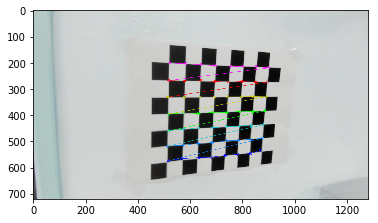

In [33]:
RGBobjpoints = []
RGBimgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_calibration_data/*.png')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of RGB image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
#     print(len(corners))

    # If found, add object points, image points
    if ret == True:
        RGBobjpoints.append(objp)
        RGBimgpoints.append(corners)
        print(fname)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
        

In [35]:
print('Camera calibration by recorded RGB image...')
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(RGBobjpoints), len(RGBimgpoints))
print(RGBobjpoints[0].shape, RGBimgpoints[0].shape)
print(img_size)
ret, RGB_mtx, RGB_dist, RGB_rvecs, RGB_tvecs = cv2.calibrateCamera(RGBobjpoints, RGBimgpoints, img_size,None,None)
RGB_Vr = np.array(RGB_rvecs)
RGB_Tr = np.array(RGB_tvecs)
RGB_extrinsics = np.concatenate((RGB_Vr, RGB_Tr), axis=1).reshape(-1,6)
print(RGB_mtx)
print(RGB_dist)
print()
print(RGB_extrinsics)
print(RGB_Tr)

Camera calibration by recorded RGB image...
6 6
(56, 3) (56, 1, 2)
(1280, 720)
[[964.30607758   0.         654.65974554]
 [  0.         954.28084927 376.62098321]
 [  0.           0.           1.        ]]
[[ 3.88969141e-01 -3.47643131e+00 -1.67509338e-02  9.51395905e-03
   1.08123514e+01]]

[[ 0.64971378 -0.52459439 -2.96987148 17.46321783  4.38219667 56.53249803]
 [ 0.10998719  0.13140109 -3.10317187  0.4460152   5.61205837 48.77510126]
 [-0.10222641 -0.11950127 -3.03912994 11.99223899  4.71131302 50.52360333]
 [ 0.38649732  0.34748166 -3.02157217 13.5701142   5.85023444 48.33930346]
 [-0.48372657 -0.08332194 -3.04214372  7.03557708  7.6633804  42.50693663]
 [ 0.65158493  0.23369435 -3.05596033 10.28642547  7.77562905 46.15009695]]
[[[17.46321783]
  [ 4.38219667]
  [56.53249803]]

 [[ 0.4460152 ]
  [ 5.61205837]
  [48.77510126]]

 [[11.99223899]
  [ 4.71131302]
  [50.52360333]]

 [[13.5701142 ]
  [ 5.85023444]
  [48.33930346]]

 [[ 7.03557708]
  [ 7.6633804 ]
  [42.50693663]]

 [[10.